# Gacha Strategies Analysis

## authors

No | Name | ID | GitHub username | In charge activity
:-: | :- | :-: | :- | :-
1 | Akhtarriza Harafah | 10222011 | [Rafahhh](https://github.com/Rafahhh) | Discussion on GitHub issues & Youtube presentation video
2 | Muhamad Daryl Putra Akbar Kusdinar | 10222070 | [darylkusdinar](https://github.com/darylkusdinar) | Notebook finalization
3 | Muhammad Ya'mal Amilun | 10222070 | [catarina-claes](https://github.com/catarina-claes) | Slide on OSF

## abstract
Informasi: Simulasi gacha dilakukan untuk 100 user selama 5 hari, masing-masing 2 pull per hari, dengan fitur rate-up untuk hero rare. Data rare diperoleh dari hasil pull setiap user.

Metode: Distribusi rare dianalisis menggunakan rata-rata, standar deviasi, serta identifikasi user paling beruntung dan tidak beruntung berdasarkan rare hero yang didapatkan.

Hasil: Rata-rata rare per user adalah 0.7 dengan standar deviasi 0.49. User paling beruntung adalah User 47, sementara User 88 adalah yang paling tidak beruntung.

Kesimpulan: Simulasi menunjukkan distribusi rare mengikuti peluang yang diberikan, dengan variasi hasil di antara user. Rate-up efektif meningkatkan distribusi rare tertentu.

## background
Tujuan: Menganalisis hasil simulasi sistem gacha untuk memahami distribusi rare hero, mengidentifikasi pola keberuntungan user, dan mengevaluasi efektivitas rate-up dalam meningkatkan peluang rare hero.

Masalah yang Diselesaikan: Bagaimana mendistribusikan rare hero secara adil di antara user dan mengevaluasi apakah rate-up memberikan dampak signifikan pada hasil pull.

Current State & Similiar Work: Sistem gacha sering digunakan dalam game populer untuk memberikan elemen kejutan dan motivasi pembelian. Studi serupa menyoroti pengaruh probabilitas, fairness, dan kepuasan user terhadap sistem gacha.

Referensi Game Gacha Terkenal:

1. Genshin Impact
2. Fate/Grand Order
3. Azur Lane
4. Epic Seven

## method
Data gacha diperoleh menggunakan simulasi dari program python dengan sourcecode sebagai berikut:

In [ ]:
import random
import csv

# Definisi hero dan peluangnya
heroes = {
    "Rare_A": 0.01, "Rare_B": 0.005, "Rare_C": 0.007, "Rare_D": 0.008, "Rare_E": 0.006,
    "Common_A": 0.15, "Common_B": 0.2, "Common_C": 0.18, "Common_D": 0.22, "Common_E": 0.2
}

# Fungsi untuk simulasi gacha
def pull_gacha(rate_up_hero=None, rate_up_bonus=0.01):
    """
    Simulasi 1 kali pull gacha.
    :param rate_up_hero: Hero rare yang mendapatkan bonus rate up.
    :param rate_up_bonus: Bonus peluang untuk hero rate up.
    :return: Hero yang didapat.
    """
    adjusted_heroes = heroes.copy()

    # Adjust peluang untuk rate up hero jika ada
    if rate_up_hero and rate_up_hero in adjusted_heroes:
        adjusted_heroes[rate_up_hero] += rate_up_bonus

    # Normalisasi peluang jika ada rate up
    total_probability = sum(adjusted_heroes.values())
    for hero in adjusted_heroes:
        adjusted_heroes[hero] /= total_probability

    # Pilih hero berdasarkan peluang
    choices, probabilities = zip(*adjusted_heroes.items())
    return random.choices(choices, probabilities)[0]

# Simulasi 5 hari dengan 100 user, 2 pull per hari
num_users = 100
pulls_per_user_per_day = 2
num_days = 5
rate_up_schedule = ["Rare_A", "Rare_B", "Rare_C", "Rare_D", "Rare_E"]

# Simpan hasil pull
results = {hero: 0 for hero in heroes}
user_data = {user: [] for user in range(1, num_users + 1)}

for day in range(1, num_days + 1):
    rate_up_hero = rate_up_schedule[day - 1]
    for user in range(1, num_users + 1):
        for _ in range(pulls_per_user_per_day):
            hero_pulled = pull_gacha(rate_up_hero=rate_up_hero)
            results[hero_pulled] += 1
            user_data[user].append(hero_pulled)

# Cetak hasil
print("Total pulls for each hero:")
for hero, count in results.items():
    print(f"{hero}: {count}")

# Analisis distribusi rare
rare_heroes = [hero for hero in heroes if "Rare" in hero]
rare_counts_per_user = [sum(1 for hero in user_data[user] if hero in rare_heroes) for user in user_data]

average_rare = sum(rare_counts_per_user) / num_users
std_dev_rare = (sum((x - average_rare) ** 2 for x in rare_counts_per_user) / num_users) ** 0.5

most_lucky_user = max(user_data, key=lambda u: sum(1 for h in user_data[u] if h in rare_heroes))
unluckiest_user = min(user_data, key=lambda u: sum(1 for h in user_data[u] if h in rare_heroes))

print("\nDistribusi rare:")
print(f"Rata-rata rare per user: {average_rare:.2f}")
print(f"Standar deviasi rare: {std_dev_rare:.2f}")
print(f"User paling beruntung: User {most_lucky_user}")
print(f"User paling ampas: User {unluckiest_user}")

# Simpan hasil dalam CSV
with open("gacha_results.csv", "w", newline="") as file:
    writer = csv.writer(file)

    # Header
    header = ["User"] + [f"Day {day} Pull {pull}" for day in range(1, num_days + 1) for pull in range(1, pulls_per_user_per_day + 1)]
    writer.writerow(header)

    # Data tiap user
    for user, pulls in user_data.items():
        row = [user] + pulls
        writer.writerow(row)

print("Hasil gacha disimpan dalam 'gacha_results.csv'")

## results and dicussion
Analisis dimulai dengan inisialisasi pembacaan file csv. Setiap analisis menjawab subtopiknya masing-masing.

In [25]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv("../results/gacha_results.csv")

# Membaca file CSV
file_name = "../results/gacha_results.csv"

### Analisis tren performa gacha selama 5 hari
- Analisis tren performa gacha selama 5 hari: 
    - Berapa total rare yang didapatkan per hari?
    - Apakah ada hari yang lebih “beruntung” dibandingkan hari lainnya?
- Visualisasikan tren dalam grafik.


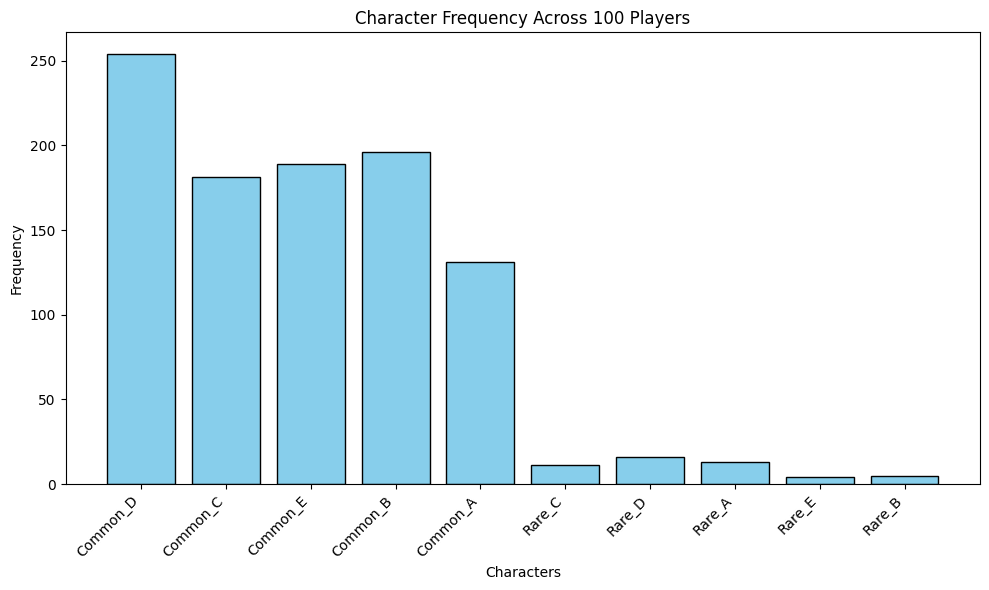

In [10]:
# Mengumpulkan semua karakter dari file CSV

all_characters = []
with open(file_name, "r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Membaca header
    for row in reader:
        all_characters.extend(row[1:])  # Semua karakter di kolom pull

# Menghitung frekuensi karakter
character_counts = Counter(all_characters)

# Membuat grafik
characters = list(character_counts.keys())
frequencies = list(character_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(characters, frequencies, color='skyblue', edgecolor='black')
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.title("Character Frequency Across 100 Players")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menampilkan grafik
plt.show()



### Distribusi jumlah rare setiap user
- Analisis distribusi jumlah rare yang didapatkan per user.
- Hitung rata-rata, median, dan standar deviasi jumlah rare.
- Identifikasi user paling beruntung dan paling tidak beruntung

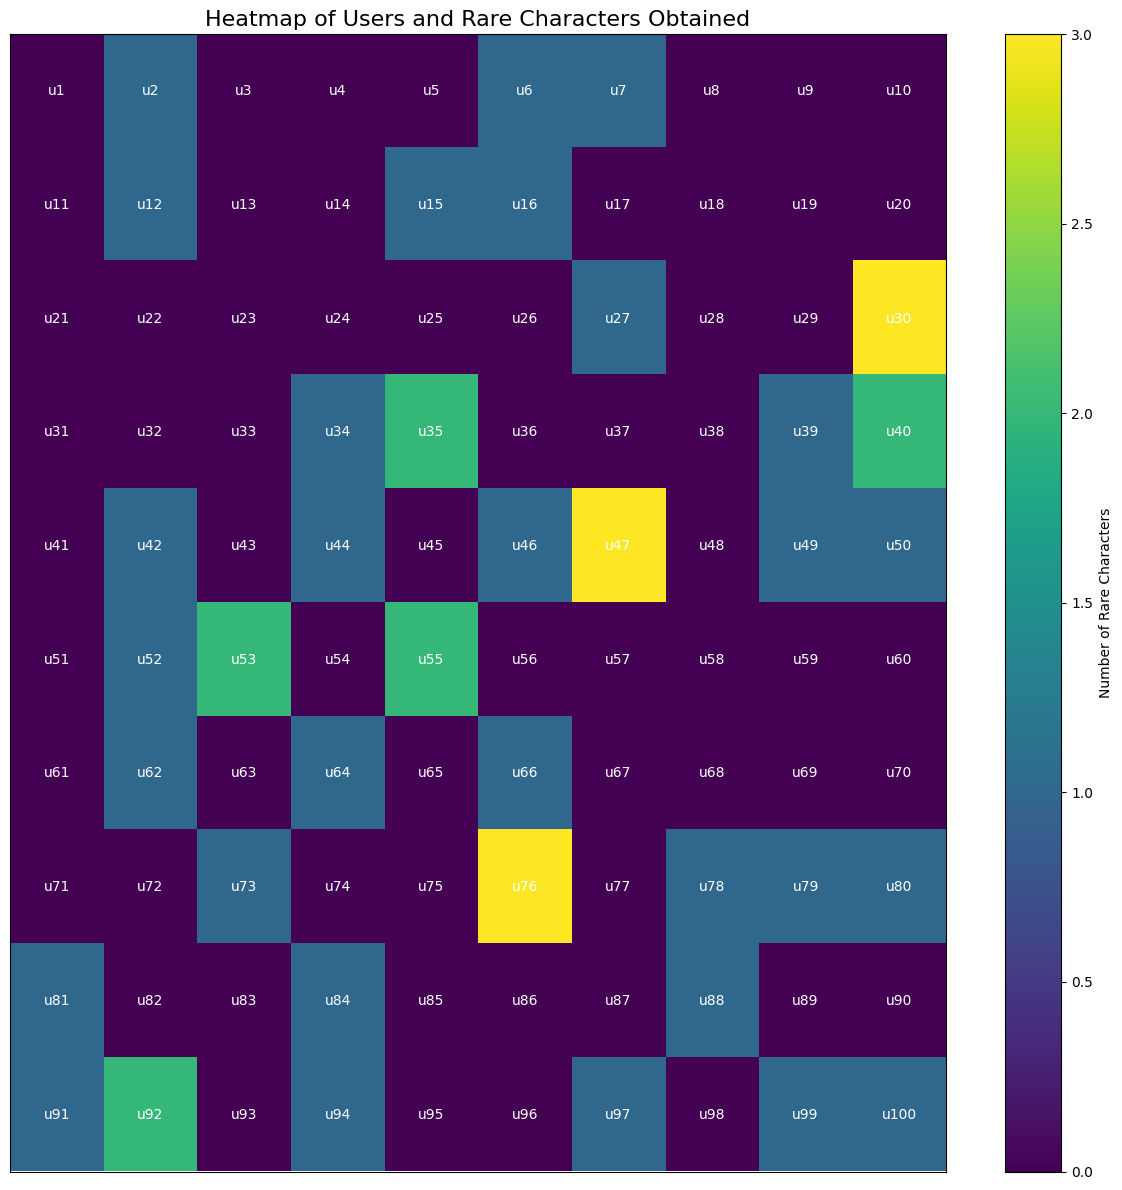

In [11]:
# Definisi karakter rare
rare_characters = {"Rare_A", "Rare_B", "Rare_C", "Rare_D", "Rare_E"}

# Menghitung jumlah rare untuk setiap user
user_rare_counts = {}
with open(file_name, "r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Membaca header
    for row in reader:
        user_id = int(row[0])  # Konversi ID user ke integer
        pulls = row[1:]
        rare_count = sum(1 for pull in pulls if pull in rare_characters)
        user_rare_counts[user_id] = rare_count

# Menyiapkan data untuk heatmap
users = sorted(user_rare_counts.keys())  # Pastikan urut
rare_counts = [user_rare_counts[user] for user in users]

# Membentuk data menjadi matriks (misal, 10 baris x 10 kolom untuk 100 user)
matrix_size = 10
heatmap_data = np.array(rare_counts).reshape(matrix_size, matrix_size)

# Membuat visualisasi kotak besar dengan kotak kecil di dalamnya
plt.figure(figsize=(12, 12))  # Ukuran gambar yang besar
plt.imshow(heatmap_data, cmap="viridis", aspect="auto")  # `viridis` untuk gradasi warna
plt.colorbar(label="Number of Rare Characters", orientation="vertical")

# Menambahkan label user ID ke dalam kotak kecil
for i in range(matrix_size):
    for j in range(matrix_size):
        user_id = i * matrix_size + j + 1  # Menentukan ID user (u1 hingga u100)
        plt.text(j, i, f"u{user_id}", ha="center", va="center", color="white", fontsize=10)

# Menghilangkan label sumbu x dan y
plt.xticks([])
plt.yticks([])

# Memberikan judul
plt.title("Heatmap of Users and Rare Characters Obtained", fontsize=16)

# Menampilkan gambar
plt.tight_layout()
plt.show()


### Analisis peluang hero
- Hitung peluang mendapatkan setiap hero (rare dan common) selama 5 hari.
- Identifikasi hero yang paling rare dan paling common berdasarkan data.
- Analisis peluang meningkatnya hero rare pada hari tertentu (efektivitas rate up).


In [19]:
# Menghitung frekuensi setiap hero
hero_counts = data.iloc[:, 1:].melt(value_name='Hero')['Hero'].value_counts()

# Menghitung total pulls
total_pulls = hero_counts.sum()

# Menghitung peluang
hero_probabilities = hero_counts / total_pulls

# Menampilkan peluang
print(hero_probabilities)

Hero
Common_D    0.254
Common_B    0.196
Common_E    0.189
Common_C    0.181
Common_A    0.131
Rare_D      0.016
Rare_A      0.013
Rare_C      0.011
Rare_B      0.005
Rare_E      0.004
Name: count, dtype: float64


In [20]:
# Hero paling common
most_common_hero = hero_probabilities.idxmax()
most_common_probability = hero_probabilities.max()

# Hero paling rare
most_rare_hero = hero_probabilities.idxmin()
most_rare_probability = hero_probabilities.min()

print(f'Hero paling common: {most_common_hero} dengan peluang {most_common_probability:.2%}')
print(f'Hero paling rare: {most_rare_hero} dengan peluang {most_rare_probability:.2%}')

Hero paling common: Common_D dengan peluang 25.40%
Hero paling rare: Rare_E dengan peluang 0.40%


   Rare_D  Rare_A  Rare_C  Rare_B  Rare_E
1   0.010   0.025   0.000   0.005   0.005
2   0.030   0.010   0.000   0.005   0.005
3   0.015   0.010   0.035   0.010   0.000
4   0.020   0.005   0.010   0.005   0.000
5   0.005   0.015   0.010   0.000   0.010


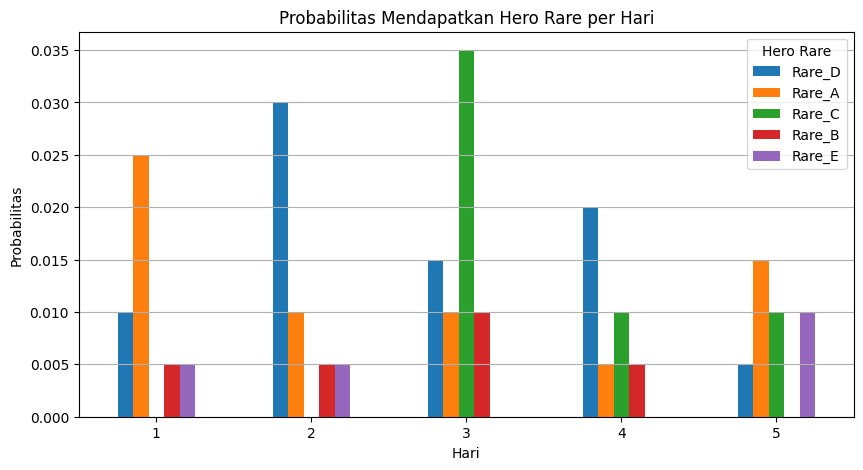

In [23]:
# Menghitung frekuensi hero rare
rare_heroes = [hero for hero in hero_counts.index if 'Rare' in hero]

# Menghitung frekuensi setiap hero rare per hari
rare_counts_per_day = {hero: [] for hero in rare_heroes}

for day in range(1, 6):
    day_data = data.iloc[:, (day - 1) * 2 + 1:(day - 1) * 2 + 3]  # Mengambil dua pull per hari
    for hero in rare_heroes:
        count = day_data.isin([hero]).sum().sum()  # Menghitung jumlah kemunculan hero
        rare_counts_per_day[hero].append(count)

# Menghitung probabilitas untuk setiap hero rare per hari
total_pulls_per_day = len(data) * 2  # Total pulls per day (2 pulls per user)
probabilities_per_day = {hero: [count / total_pulls_per_day for count in counts] for hero, counts in rare_counts_per_day.items()}

# Menampilkan probabilitas
probabilities_df = pd.DataFrame(probabilities_per_day, index=range(1, 6))
print(probabilities_df)

# Visualisasi bar chart
probabilities_df.plot(kind='bar', figsize=(10, 5))
plt.title('Probabilitas Mendapatkan Hero Rare per Hari')
plt.xlabel('Hari')
plt.ylabel('Probabilitas')
plt.xticks(rotation=0)
plt.legend(title='Hero Rare')
plt.grid(axis='y')
plt.show()

Pada grafik di atas terlihat bahwa setiap hari terdapat *rate-up*, dengan hari ke-1 dan ke-5 "Rare_A" memiliki *rate-up*, hari ke-2 dan ke-4 "Rare_D" memiliki *rate-up*, hari ke-3 "Rare_C" memiliki *rate-up*.

### Harga ekspetasi hero
- Hitung harga ekspektasi untuk mendapatkan setiap hero (rare dan common).
- Bandingkan antara hero dengan rate up dan tanpa rate up.

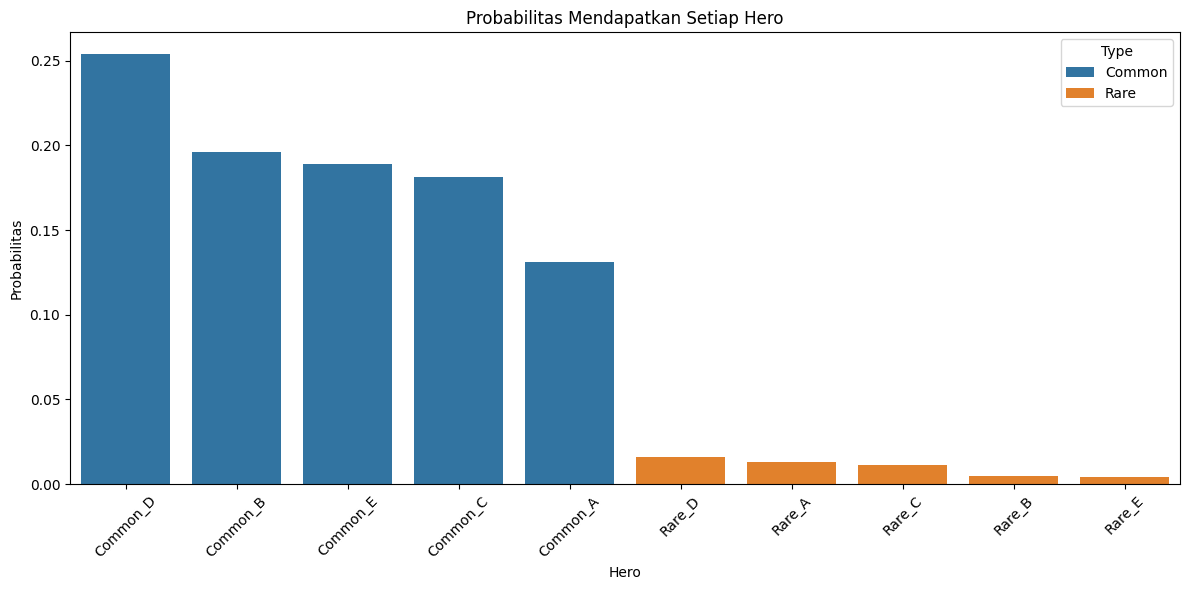

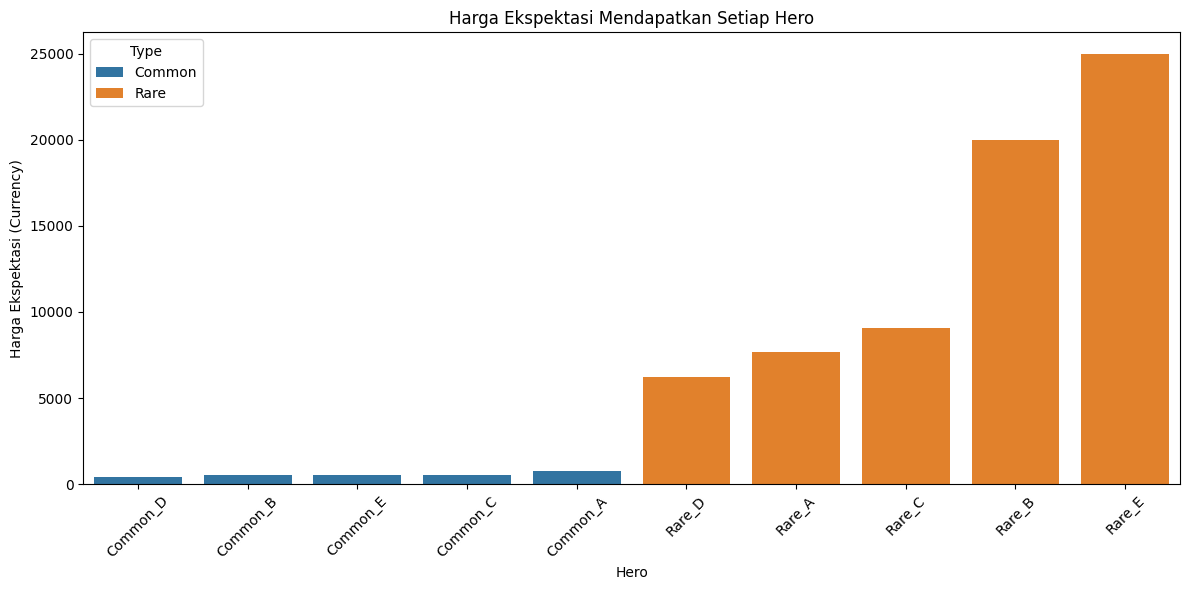


Analisis Rate Up Heroes:
     Hero  Type  Probability  Expected Cost
5  Rare_D  Rare        0.016    6250.000000
6  Rare_A  Rare        0.013    7692.307692
7  Rare_C  Rare        0.011    9090.909091
8  Rare_B  Rare        0.005   20000.000000
9  Rare_E  Rare        0.004   25000.000000

Analisis Non-Rate Up Heroes:
       Hero    Type  Probability  Expected Cost
0  Common_D  Common        0.254     393.700787
1  Common_B  Common        0.196     510.204082
2  Common_E  Common        0.189     529.100529
3  Common_C  Common        0.181     552.486188
4  Common_A  Common        0.131     763.358779


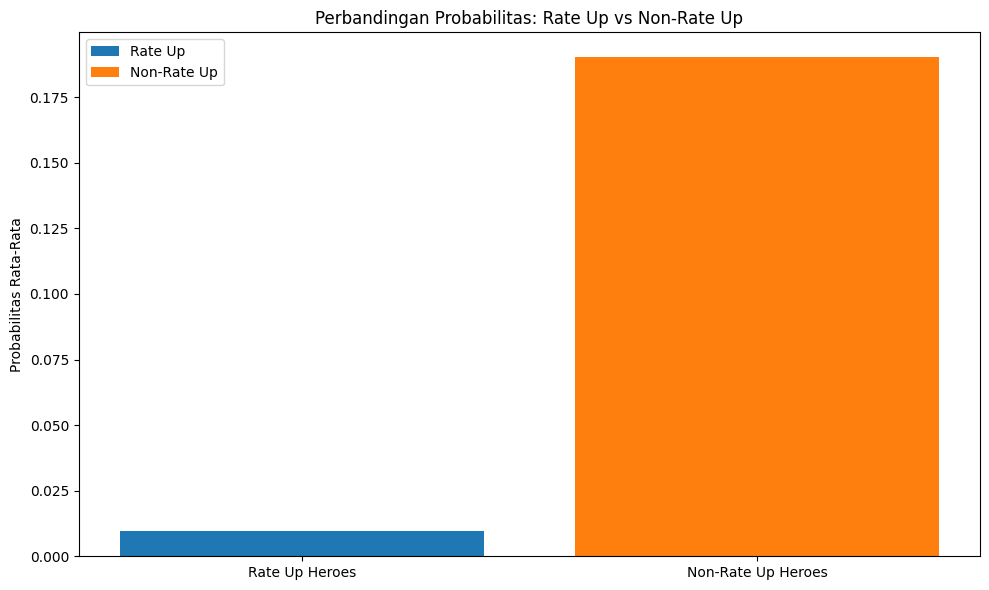

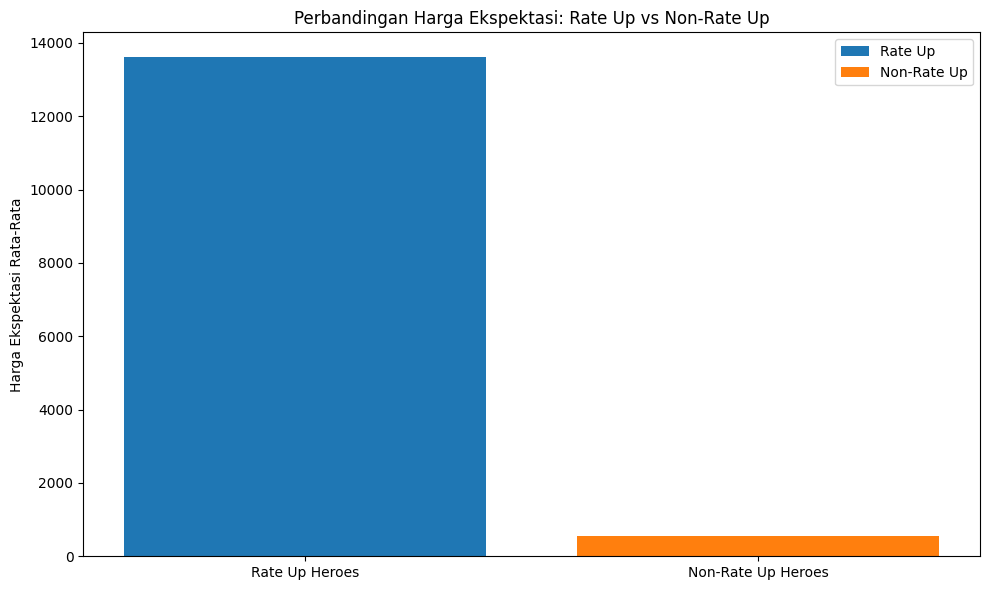


Ringkasan Statistik Rate Up Heroes:
       Probability  Expected Cost
count     5.000000       5.000000
mean      0.009800   13606.643357
std       0.005167    8369.214547
min       0.004000    6250.000000
25%       0.005000    7692.307692
50%       0.011000    9090.909091
75%       0.013000   20000.000000
max       0.016000   25000.000000

Ringkasan Statistik Non-Rate Up Heroes:
       Probability  Expected Cost
count      5.00000       5.000000
mean       0.19020     549.770073
std        0.04386     134.143423
min        0.13100     393.700787
25%        0.18100     510.204082
50%        0.18900     529.100529
75%        0.19600     552.486188
max        0.25400     763.358779


In [26]:
# Menghitung frekuensi total setiap hero
hero_counts = data.iloc[:, 1:].melt(value_name='Hero')['Hero'].value_counts()
total_pulls = len(data) * 10  # 10 pulls per user (2 pulls per hari selama 5 hari)

# Fungsi untuk menghitung harga ekspektasi
def calculate_expected_cost(hero_probability, target_hero_count=1, pull_cost=100):
    """
    Menghitung harga ekspektasi untuk mendapatkan hero tertentu
    
    :param hero_probability: Probabilitas mendapatkan hero
    :param target_hero_count: Jumlah hero yang diinginkan
    :param pull_cost: Biaya per pull
    :return: Estimasi biaya untuk mendapatkan hero
    """
    # Menggunakan distribusi geometrik
    expected_pulls = target_hero_count / hero_probability
    expected_cost = expected_pulls * pull_cost
    return expected_cost

# Menghitung probabilitas dan harga ekspektasi untuk setiap hero
hero_analysis = []
for hero, count in hero_counts.items():
    probability = count / total_pulls
    expected_cost = calculate_expected_cost(probability)
    hero_type = 'Rare' if 'Rare' in hero else 'Common'
    
    hero_analysis.append({
        'Hero': hero,
        'Type': hero_type,
        'Probability': probability,
        'Expected Cost': expected_cost
    })

# Membuat DataFrame dari analisis
hero_df = pd.DataFrame(hero_analysis)

# Visualisasi Probabilitas Hero
plt.figure(figsize=(12, 6))
sns.barplot(x='Hero', y='Probability', hue='Type', data=hero_df)
plt.title('Probabilitas Mendapatkan Setiap Hero')
plt.xlabel('Hero')
plt.ylabel('Probabilitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Harga Ekspektasi
plt.figure(figsize=(12, 6))
sns.barplot(x='Hero', y='Expected Cost', hue='Type', data=hero_df)
plt.title('Harga Ekspektasi Mendapatkan Setiap Hero')
plt.xlabel('Hero')
plt.ylabel('Harga Ekspektasi (Currency)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analisis Rate Up
# Misalkan hero dengan prefix 'Rare' adalah hero dengan rate up
rate_up_heroes = hero_df[hero_df['Hero'].str.contains('Rare')]
non_rate_up_heroes = hero_df[~hero_df['Hero'].str.contains('Rare')]

print("\nAnalisis Rate Up Heroes:")
print(rate_up_heroes)

print("\nAnalisis Non-Rate Up Heroes:")
print(non_rate_up_heroes)

# Perbandingan Probabilitas Rate Up vs Non-Rate Up
plt.figure(figsize=(10, 6))
plt.bar('Rate Up Heroes', rate_up_heroes['Probability'].mean(), label='Rate Up')
plt.bar('Non-Rate Up Heroes', non_rate_up_heroes['Probability'].mean(), label='Non-Rate Up')
plt.title('Perbandingan Probabilitas: Rate Up vs Non-Rate Up')
plt.ylabel('Probabilitas Rata-Rata')
plt.legend()
plt.tight_layout()
plt.show()

# Perbandingan Harga Ekspektasi Rate Up vs Non-Rate Up
plt.figure(figsize=(10, 6))
plt.bar('Rate Up Heroes', rate_up_heroes['Expected Cost'].mean(), label='Rate Up')
plt.bar('Non-Rate Up Heroes', non_rate_up_heroes['Expected Cost'].mean(), label='Non-Rate Up')
plt.title('Perbandingan Harga Ekspektasi: Rate Up vs Non-Rate Up')
plt.ylabel('Harga Ekspektasi Rata-Rata')
plt.legend()
plt.tight_layout()
plt.show()

# Ringkasan Statistik
print("\nRingkasan Statistik Rate Up Heroes:")
print(rate_up_heroes.describe())

print("\nRingkasan Statistik Non-Rate Up Heroes:")
print(non_rate_up_heroes.describe())

Berdasarkan hasil di atas, semakin kecil probabilitas hero secara umum, maka harga ekspektasi untuk hero tersebut akan meningkat juga.

## conclusion
Berdasarkan hasil analisis dan probabilitasnya, dapat dikatakan untuk mendapatkan hero rare yang diinginkan lebih baik saat pada kondisi ada *rate-up* yakni pada hari-hari tertentu.